In [7]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import re

In [14]:
x = '[20220817,13:06:05.208] INFO:root Block 1649922, txn nan: pnl=$1.31, cumulative_pnl=$56678.39'
r = re.compile('.*Block (\d+).*pnl=\$(\d+\.\d{2}), cumulative_pnl=\$(\d+\.\d{2})')
print(r.match(x).groups())
y = "[20220817,13:06:06.938] INFO:root Block 1649974, txn nan: orders = [Order(order_id=146887, amount_in=100000000, path=['0x818ec0A7Fe18Ff94269904fCED6AE3DaE6d6dC0b', '0xfA9343C3897324496A05fC75abeD6bAC29f8A40f', '0xAcc15dC74880C9944775448304B263D191c6077F', '0x818ec0A7Fe18Ff94269904fCED6AE3DaE6d6dC0b'], block_num=1649974, last_txn_index=None, metadata={'input_usd_notional': 102.5683365957335, 'expected_out_amount': 801144.6005322039, 'expected_pnl': 0.8217206904924155})] | /home/kapil/Desktop/Polkadot-Arb/moonbeam-py/simulation/trading_simulator.py:238"
rr = re.compile('.*Block (\d+).*path=\[\'(0x[a-zA-Z0-9]+).*input_usd_notional\': (\d+\.\d+).*expected_pnl\': (\d+\.\d+).*')
print(rr.match(y).groups())

('1649922', '1.31', '56678.39')
('1649974', '0x818ec0A7Fe18Ff94269904fCED6AE3DaE6d6dC0b', '102.5683365957335', '0.8217206904924155')


In [58]:
blocks = []
pnls = []
cum_pnls = []
with open('../sim_per_block.out', 'r') as f:
    for line in f:
        m = r.match(line)
        if m is not None:
            b = int(m.group(1))
            #if b < 1_100_000 or b > 1_530_000:
            #    continue
            blocks.append(b)
            pnls.append(float(m.group(2)))
            cum_pnls.append(float(m.group(3)))

blocks = np.array(blocks)
pnls = np.array(pnls)
cum_pnls = np.array(cum_pnls)

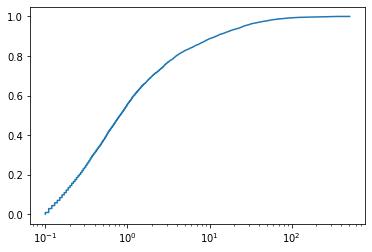

In [59]:
plt.plot(np.sort(pnls), np.linspace(0, 1, len(pnls), endpoint=False))
plt.xscale('log')

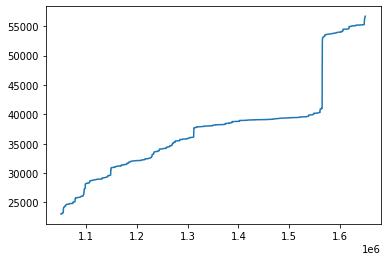

In [69]:
f = (blocks > 1050000) & (blocks < 15300000)
plt.plot(blocks[f], cum_pnls[f])

In [55]:
d = defaultdict(list)
e = defaultdict(list)
with open('../sim_per_block.out', 'r') as f:
    for line in f:
        m = rr.match(line)
        if m is not None:
            block = int(m.group(1))
            token_address = m.group(2)
            input_usd_notional = float(m.group(3))
            expected_pnl = float(m.group(4))
            if block > 1550000 and block < 1710000 and input_usd_notional < 800000:
                d[token_address].append(expected_pnl)
                e[token_address].append(input_usd_notional)

print('Token address -> (total profit, # profitable instances')
{k: (sum(v), len(v)) for k, v in d.items()}

Token address -> (total profit, # profitable instances


{'0x27292cf0016E5dF1d8b37306B2A98588aCbD6fCA': (681.2704602318524, 82),
 '0xAcc15dC74880C9944775448304B263D191c6077F': (2599.281907667261, 754),
 '0x818ec0A7Fe18Ff94269904fCED6AE3DaE6d6dC0b': (9807.111772573107, 591),
 '0x0E358838ce72d5e61E0018a2ffaC4bEC5F4c88d2': (2972.7332709236252, 552),
 '0xfA9343C3897324496A05fC75abeD6bAC29f8A40f': (456.1655167492189, 126)}

In [56]:
{k: np.percentile(v, [75, 90, 95, 98, 99, 99.9, 100]).tolist() for k, v in e.items()}

{'0x27292cf0016E5dF1d8b37306B2A98588aCbD6fCA': [114.55570035246494,
  119.89145779420116,
  123.39941725350022,
  694.8477702349293,
  1627.1860311347887,
  1631.13134002074,
  1631.5697076747347],
 '0xAcc15dC74880C9944775448304B263D191c6077F': [77.60823412741212,
  674.2556036559503,
  760.515784373165,
  859.8311354394565,
  962.3163540178056,
  1100.2373723017395,
  1130.1782602894295],
 '0x818ec0A7Fe18Ff94269904fCED6AE3DaE6d6dC0b': [103.59892933726863,
  1106.9632294160829,
  1184.607587327701,
  1253.2214559720064,
  1286.2258166782053,
  1333.7355474054996,
  1350.3143925016748],
 '0x0E358838ce72d5e61E0018a2ffaC4bEC5F4c88d2': [190.3375638486877,
  227.47187746406294,
  254.283229196107,
  266.0668759022833,
  274.283538174753,
  3086.588414498818,
  3114.9146167550766],
 '0xfA9343C3897324496A05fC75abeD6bAC29f8A40f': [170.89437669154464,
  174.18043791113575,
  179.69971729266652,
  697.9595433405193,
  698.1683858689282,
  698.1683858689282,
  698.1683858689282]}